In [2]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------- -------------------- 0.7/1.3 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 12.2 MB/s eta 0:00:00


In [4]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
# gestión de datos
import numpy as np
import pandas as pd

# fechas
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("viviendas_regresion_basica (1).csv")

# Se trata de predecir a cuanto se van a vender las 3 ultimas casas que han entrado en el dataset. Por lo tanto tendremos que predecir el precio para que se vendan.

# Business understanding: Saber si es regresión o clasificación. Si es a cuanto se va a vender es regresión. Y si fuera saber si se vende o no, clasificación

In [8]:
df

id_vivienda  superficie num_hab  distancia fecha_const parking  premiada  \
0          viv_1        65.0       1          7  1991-01-01     ext         0   
1          viv_2        97.0      4+          8  1994-01-01     ext         0   
2          viv_3        80.0      4+          4  1970-01-01     NaN         0   
3          viv_4        73.0       1          1  1983-01-01     ext         0   
4          viv_5        86.0       2          8  1999-01-01     NaN         0   
...          ...         ...     ...        ...         ...     ...       ...   
6998    viv_6999       128.0       3          5  1979-01-01     NaN         0   
6999    viv_7000        77.0      4+          7  1996-01-01     ext         0   
7000    viv_7001       128.0       3          6  2022-01-01     ext         0   
7001    viv_7002        93.0      4+          9  1988-01-01     NaN         0   
7002    viv_7003        68.0       2          3  1972-01-01     NaN         0   

      tam_buzon    precio  impuestos  vendida  
0           0.9  166000.0    16600.0      1.0  
1           1.8  279000.0    27900.0      1.0  
2           1.0  233000.0    23300.0      1.0  
3           1.1  182000.0    18200.0      1.0  
4           1.2  210000.0    21000.0      1.0  
...         ...       ...        ...      ...  
6998        1.3  317000.0    31700.0      0.0  
6999        1.5  177000.0    17700.0      0.0  
7000        0.7       NaN        NaN      NaN  
7001        1.5       NaN        NaN      NaN  
7002        0.7       NaN        NaN      NaN  

[7003 rows x 11 columns]

In [9]:
df.info() #vemos los tipos de datos(variables) de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_vivienda  7003 non-null   object 
 1   superficie   6993 non-null   float64
 2   num_hab      7003 non-null   object 
 3   distancia    7003 non-null   int64  
 4   fecha_const  7003 non-null   object 
 5   parking      4764 non-null   object 
 6   premiada     7003 non-null   int64  
 7   tam_buzon    7003 non-null   float64
 8   precio       7000 non-null   float64
 9   impuestos    7000 non-null   float64
 10  vendida      7000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 601.9+ KB


In [10]:
df.nunique()

id_vivienda    7003
superficie       71
num_hab           4
distancia        10
fecha_const      60
parking           2
premiada          2
tam_buzon        16
precio          241
impuestos       241
vendida           2
dtype: int64

# determinar el perimetro. Decir que datos voy a usar para entrenar y cuales para predecir. en este caso son 7003 viviendas. Entrenaré con 7000 y predeciré las 3 ultimas

In [11]:
df_predecir = df[df["precio"].isnull()]
df_predecir

# otra forma de hacerlo. df_predecir = df.tail(3)

id_vivienda  superficie num_hab  distancia fecha_const parking  premiada  \
7000    viv_7001       128.0       3          6  2022-01-01     ext         0   
7001    viv_7002        93.0      4+          9  1988-01-01     NaN         0   
7002    viv_7003        68.0       2          3  1972-01-01     NaN         0   

      tam_buzon  precio  impuestos  vendida  
7000        0.7     NaN        NaN      NaN  
7001        1.5     NaN        NaN      NaN  
7002        0.7     NaN        NaN      NaN

In [12]:
df = df.head(7000)
df

id_vivienda  superficie num_hab  distancia fecha_const parking  premiada  \
0          viv_1        65.0       1          7  1991-01-01     ext         0   
1          viv_2        97.0      4+          8  1994-01-01     ext         0   
2          viv_3        80.0      4+          4  1970-01-01     NaN         0   
3          viv_4        73.0       1          1  1983-01-01     ext         0   
4          viv_5        86.0       2          8  1999-01-01     NaN         0   
...          ...         ...     ...        ...         ...     ...       ...   
6995    viv_6996        98.0       2          2  2006-01-01     int         0   
6996    viv_6997       111.0      4+          2  1981-01-01     ext         0   
6997    viv_6998        76.0       3          4  2009-01-01     ext         0   
6998    viv_6999       128.0       3          5  1979-01-01     NaN         0   
6999    viv_7000        77.0      4+          7  1996-01-01     ext         0   

      tam_buzon    precio  impuestos  vendida  
0           0.9  166000.0    16600.0      1.0  
1           1.8  279000.0    27900.0      1.0  
2           1.0  233000.0    23300.0      1.0  
3           1.1  182000.0    18200.0      1.0  
4           1.2  210000.0    21000.0      1.0  
...         ...       ...        ...      ...  
6995        1.8  342000.0    34200.0      0.0  
6996        0.9  121000.0    12100.0      0.0  
6997        0.6  250000.0    25000.0      0.0  
6998        1.3  317000.0    31700.0      0.0  
6999        1.5  177000.0    17700.0      0.0  

[7000 rows x 11 columns]

# ahora como me han preguntado a cuanto se van a vender las casas, me tengo que quedar con las casas que se han vendido. Si me hubiesen preguntado que predijese si las casas se iban a vender o no, entonces deberia quedarme con las que no se han vendido tb.

In [13]:
df = df[df["vendida"]==1]

In [19]:
#como la columna vendida solo tiene valores 1, la elimino
del(df["vendida"])
del(df_predecir["vendida"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 6994
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_vivienda  5000 non-null   object 
 1   superficie   4990 non-null   float64
 2   num_hab      5000 non-null   object 
 3   distancia    5000 non-null   int64  
 4   fecha_const  5000 non-null   object 
 5   parking      3420 non-null   object 
 6   premiada     5000 non-null   int64  
 7   tam_buzon    5000 non-null   float64
 8   precio       5000 non-null   float64
 9   impuestos    5000 non-null   float64
 10  vendida      5000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 468.8+ KB


In [20]:
df.reset_index(drop=True, inplace= True)

# Analisis exploratorio

In [21]:
df.nunique()

id_vivienda    5000
superficie       71
num_hab           4
distancia        10
fecha_const      60
parking           2
premiada          2
tam_buzon        16
precio          217
impuestos       217
dtype: int64

In [22]:
df.describe().T

count                           mean                  min  \
superficie   4990.0                      96.931663                 60.0   
distancia    5000.0                         5.4106                  1.0   
fecha_const    5000  1993-11-03 21:06:20.160000128  1964-01-01 00:00:00   
premiada     5000.0                         0.0002                  0.0   
tam_buzon    5000.0                        1.24336                  0.5   
precio       5000.0                       245552.6             129000.0   
impuestos    5000.0                       24555.26              12900.0   

                             25%                  50%                  75%  \
superficie                  80.0                 98.0                114.0   
distancia                    3.0                  5.0                  8.0   
fecha_const  1979-01-01 00:00:00  1994-01-01 00:00:00  2009-01-01 00:00:00   
premiada                     0.0                  0.0                  0.0   
tam_buzon                    0.9                  1.2                  1.6   
precio                  209000.0             243000.0             282000.0   
impuestos                20900.0              24300.0              28200.0   

                             max           std  
superficie                 130.0     20.044797  
distancia                   10.0      2.786245  
fecha_const  2023-01-01 00:00:00           NaN  
premiada                     1.0      0.014142  
tam_buzon                    2.0      0.432117  
precio                  350000.0  47504.380498  
impuestos                35000.0    4750.43805

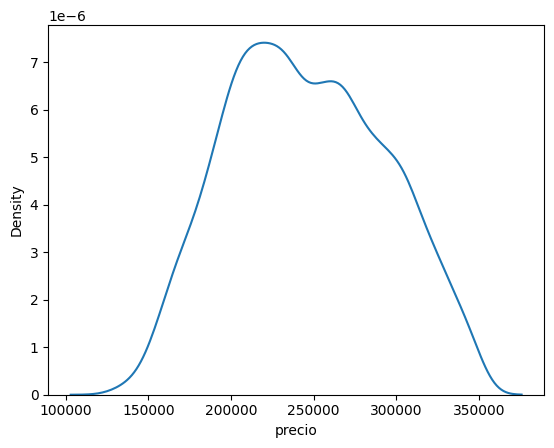

In [28]:
sns.kdeplot(data=df, x="precio")
plt.show()

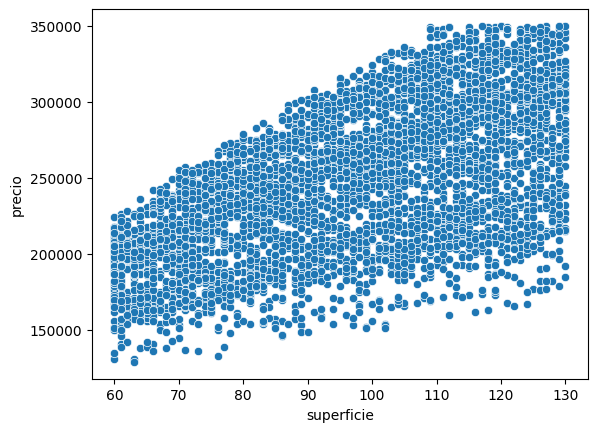

In [29]:
sns.scatterplot(data=df, x="superficie", y="precio");

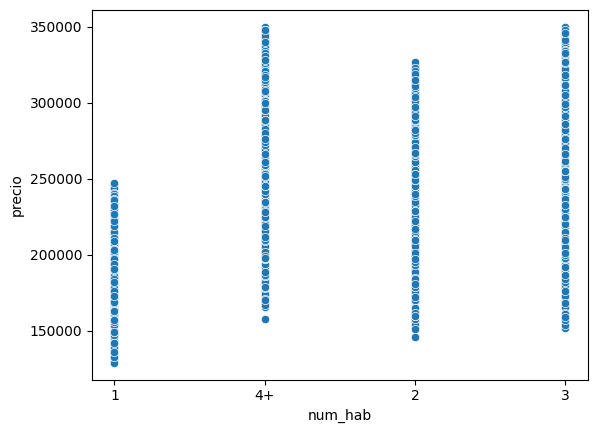

In [30]:
sns.scatterplot(data=df, x="num_hab", y="precio");

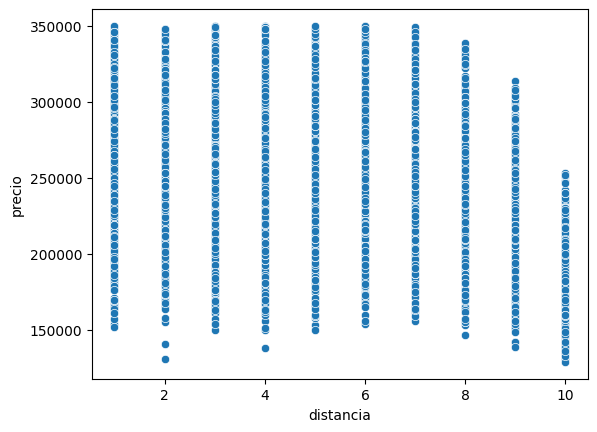

In [31]:
sns.scatterplot(data=df, x="distancia", y="precio");

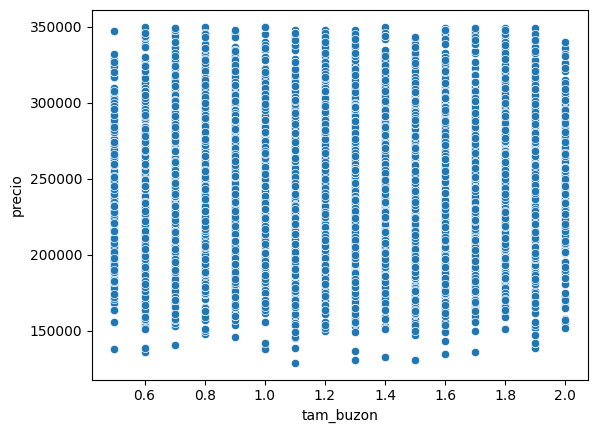

In [33]:
sns.scatterplot(data=df, x="tam_buzon", y="precio");

# vemos como el tamañao del buzón no nos aporta nada. nos lo podemos cargar

In [37]:
# comprobamos duplicados y vemos q no hay.
df.duplicated().sum()

0

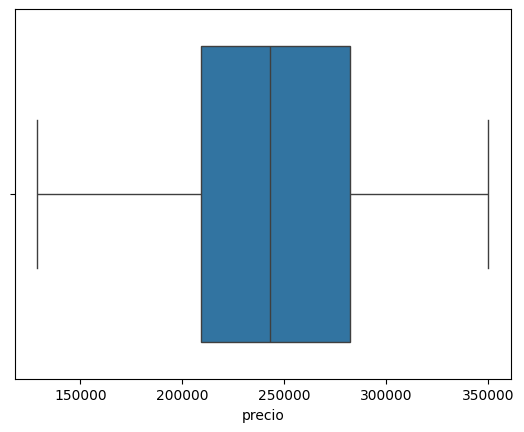

In [38]:
#outlayers
sns.boxplot(data=df, x="precio");

In [39]:
# gestionde nulos
df.isnull().sum()

id_vivienda       0
superficie       10
num_hab           0
distancia         0
fecha_const       0
parking        1580
premiada          0
tam_buzon         0
precio            0
impuestos         0
dtype: int64

In [41]:
df.drop(df[df["superficie"].isnull()].index, inplace=True)

In [42]:
df.isnull().sum()

id_vivienda       0
superficie        0
num_hab           0
distancia         0
fecha_const       0
parking        1580
premiada          0
tam_buzon         0
precio            0
impuestos         0
dtype: int64

In [43]:
df["parking"].unique()

array(['ext', nan, 'int'], dtype=object)

In [44]:
df["parking"].fillna("sin", inplace=True)
df_predecir["parking"].fillna("sin", inplace=True)

In [45]:
df.isnull().sum()

id_vivienda    0
superficie     0
num_hab        0
distancia      0
fecha_const    0
parking        0
premiada       0
tam_buzon      0
precio         0
impuestos      0
dtype: int64

In [17]:
df["fecha_const"] = pd.to_datetime(df["fecha_const"])